In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
analysis = pd.read_csv('Track_analysis.csv',index_col=0)
metadata = pd.read_csv('Track_metadata.csv',index_col=0)
musicbrainz = pd.read_csv('Track_musicbrainz.csv',index_col=0)
analysis.head()

,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,...,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id
0,22050,a600d65cf157a306be60f26ecbf218f4,0.0,280.21506,0.238,0.0,0,0,0,0,...,5,0.555,-3.306,1,0.500,275.528,173.205,5,0.120,TRACCVZ128F4291A8A
1,22050,c64d75b0588e5ab552ee94548b50a4fa,0.0,191.68608,0.000,0.0,0,0,0,0,...,0,0.501,-10.764,1,0.710,184.128,150.955,4,0.600,TRACCMH128F428E4CD
2,22050,0cadd310865701bb93ced1cd78e8910a,0.0,222.92853,0.000,0.0,0,0,0,0,...,1,0.329,-9.035,1,0.407,216.300,93.056,4,1.000,TRACCSW128F148C7C3
3,22050,14be4fc1170152c445b3be7b8d18dfec,0.0,278.38649,0.496,0.0,0,0,0,0,...,7,0.313,-23.095,1,0.387,278.386,127.113,1,0.446,TRACCXJ128F428F0CF
4,22050,1def5d8298e8cb29a188a5a7c0e9429a,0.0,89.15546,4.847,0.0,0,0,0,0,...,2,0.000,-20.359,1,0.000,79.203,90.660,3,0.524,TRACCVS12903D014F8


In [3]:
analysis.describe()

,analysis_sample_rate,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,idx_sections_confidence,...,idx_tatums_start,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence
count,10000.0,10000.0,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,22050.0,0.0,238.507518,0.758616,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.276100,0.449573,-10.485668,0.691100,0.477784,229.975465,122.915449,3.564800,0.509937
std,0.0,0.0,114.137514,1.867952,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.554087,0.274974,5.399788,0.462063,0.191254,112.195735,35.184412,1.266239,0.373409
min,22050.0,0.0,1.044440,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,-51.643000,0.000000,0.000000,1.044000,0.000000,0.000000,0.000000
25%,22050.0,0.0,176.032200,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.000000,0.225000,-13.163250,0.000000,0.360000,168.856000,96.965750,3.000000,0.097750
50%,22050.0,0.0,223.059140,0.199000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.000000,0.469000,-9.380000,1.000000,0.487000,213.879000,120.161000,4.000000,0.551000
75%,22050.0,0.0,276.375060,0.421000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.000000,0.659000,-6.532500,1.000000,0.606000,266.292000,144.013250,4.000000,0.864000
max,22050.0,0.0,1819.767710,43.119000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11.000000,1.000000,0.566000,1.000000,1.000000,1813.426000,262.828000,7.000000,1.000000


In [4]:
metadata.head()

,analyzer_version,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_name,...,idx_artist_terms,idx_similar_artists,release,release_7digitalid,song_hotttnesss,song_id,title,track_7digitalid,mbtag,term
0,NaN,29785,0.780462,0.574275,ARMQHX71187B9890D3,NaN,"Atlanta, GA",NaN,bc5e2ad6-0a4a-4d90-b911-e9a7e6861727,Mastodon,...,0,0,Call of the Mastodon,223563,0.597641,SOVLGJY12A8C13FBED,Deep Sea Creature,2442524,heavy metal,80s
1,NaN,167867,0.561590,0.420570,AR2PT4M1187FB55B1A,NaN,NaN,NaN,d54ea4a6-0b9c-4e47-bed0-289ae9ff4037,Los Chichos,...,0,0,Adelante,221677,NaN,SOGDQZK12A8C13F37C,No Quieras Marcharte,2423472,NaN,NaN
2,NaN,7725,0.687687,0.406686,ARDI88R1187B98DAB2,NaN,NaN,NaN,fd87374e-ffde-4d36-89a8-8a073f795666,Foxy Brown,...,0,0,Ill Na Na,47304,0.588922,SODMVJR12A6D4F985D,If I...,507029,NaN,NaN
3,NaN,2799,0.391741,0.291265,ARUKJUP12086C14589,NaN,NaN,NaN,8a5f2736-bcde-4a2e-8d50-72631d66a7ef,Ramón Vargas;Vladimir Jurowski,...,0,0,Massenet: Werther,295123,NaN,SOIWBDR12A8C13A4AC,Werther - Lyric Drama in four Acts/Act I/Alors...,3343102,NaN,NaN
4,NaN,74269,0.593416,0.395710,ARZEWUR1187FB53DC8,50.45663,"Belgica -- Namur, Namur/Ghent, East Flanders",4.87137,0be59867-0da4-4e45-9b64-728cdf25487c,Enthroned,...,0,0,Pentagrammaton,785362,NaN,SOHCCIA12AC907577F,Ad Te Clamamus Exsvles Mortva Liberi,8688607,NaN,NaN


In [5]:
musicbrainz.head()

,idx_artist_mbtags,year
0,0,2001
1,0,1984
2,0,0
3,0,0
4,0,2010


In [6]:
parameters = pd.DataFrame()
# leaving out duration,end_of_fade_in, start_of_fade_out and year because that is unlikely to be relevant to any metric
# key and time_signature are discrete so can't use these
parameters = analysis[['loudness','tempo']]
parameters = pd.concat([parameters,metadata[['artist_familiarity','artist_hotttnesss','song_hotttnesss']]],axis=1) 
# parameters['year'] = musicbrainz['year']

In [7]:
parameters  = parameters.loc[(parameters != 0).all(1)]
parameters = parameters.dropna()
parameters_description = parameters.describe()
parameters_description

,loudness,tempo,artist_familiarity,artist_hotttnesss,song_hotttnesss
count,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000
mean,-9.552663,124.796975,0.628294,0.439380,0.461679
std,5.043586,34.424850,0.135797,0.109984,0.167917
min,-41.691000,26.663000,0.015558,0.011562,0.187895
25%,-11.976750,97.980250,0.538138,0.366824,0.319566
50%,-8.403000,121.844500,0.620042,0.417456,0.454118
75%,-5.981000,146.611750,0.716709,0.498669,0.588922
max,0.566000,258.677000,1.000000,1.082503,1.000000


In [8]:
parameters_standard = (parameters - parameters.mean()) / parameters.std()
parameters_standard.describe()

,loudness,tempo,artist_familiarity,artist_hotttnesss,song_hotttnesss
count,4.150000e+03,4.150000e+03,4.150000e+03,4.150000e+03,4.150000e+03
mean,-1.243022e-15,1.558914e-15,5.194667e-15,-7.447858e-16,-7.511207e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.372120e+00,-2.850673e+00,-4.512163e+00,-3.889812e+00,-1.630478e+00
25%,-4.806277e-01,-7.789932e-01,-6.639101e-01,-6.596980e-01,-8.463327e-01
50%,2.279455e-01,-8.576580e-02,-6.077325e-02,-1.993365e-01,-4.503101e-02
75%,7.081594e-01,6.336927e-01,6.510776e-01,5.390644e-01,7.577738e-01
max,2.006244e+00,3.889052e+00,2.737222e+00,5.847399e+00,3.205881e+00


In [9]:
parameters.head()

,loudness,tempo,artist_familiarity,artist_hotttnesss,song_hotttnesss
0,-3.306,173.205,0.780462,0.574275,0.597641
2,-9.035,93.056,0.687687,0.406686,0.588922
5,-5.724,101.167,0.815923,0.555138,0.474055
7,-20.816,127.547,0.929030,0.750427,0.652836
8,-29.750,127.782,0.645192,0.471224,0.631601


/Users/lauren/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


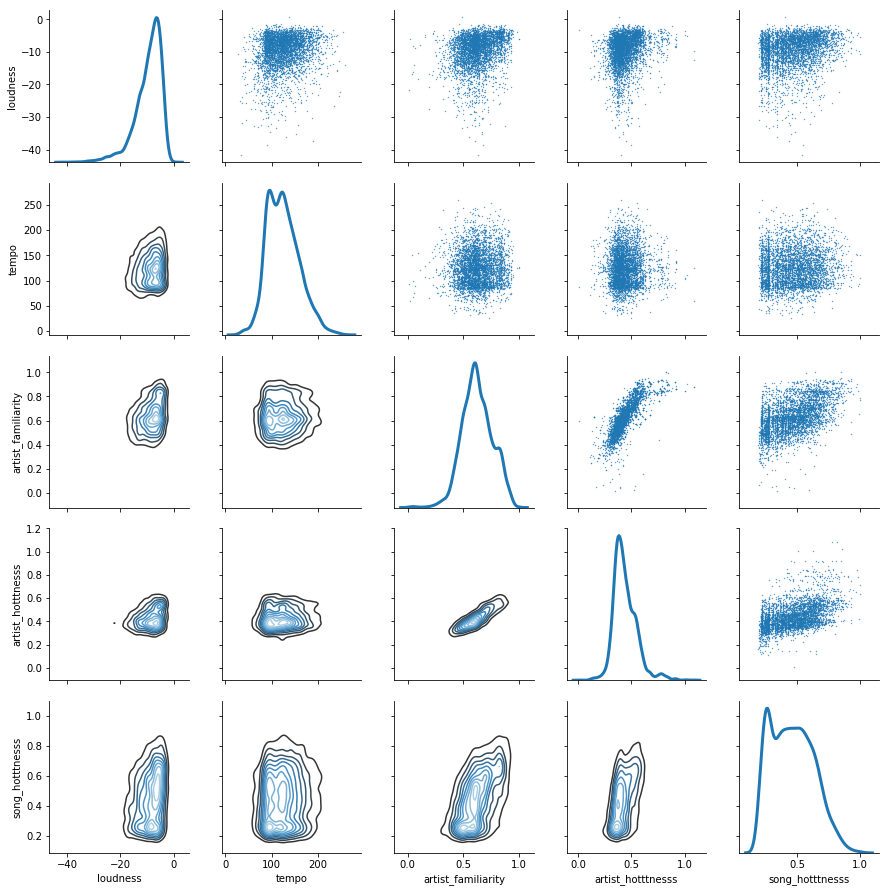

In [10]:
g = sns.PairGrid(parameters, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter, s = 0.1)
g.map_diag(sns.kdeplot, lw=3)

# KMeans Clustering

http://scikit-learn.org/stable/modules/clustering.html#k-means
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.


## Find minimum inertia (error)
Ideally, we look for a 'knee' where the error stars dropping less quickly

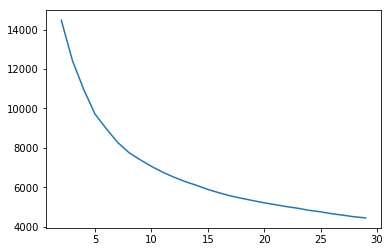

In [11]:
parameters_standard = np.array(parameters_standard)
inertia = []
k_vals = range(2,30)
for k in k_vals:
    clf = KMeans(n_clusters=k,n_jobs=-1)
    clf.fit(parameters_standard)
    cluster_labels = clf.predict(parameters_standard)
    inertia.append(clf.inertia_)
plt.plot(k_vals,inertia)

We move forward with the k-value that appears to correspond to a knee

In [12]:
k = 7
clf = KMeans(n_clusters=k,n_jobs=-1)
clf.fit(parameters_standard)
cluster_labels = clf.predict(parameters_standard)


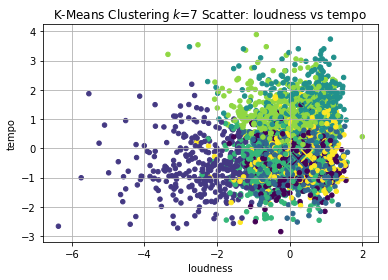

In [13]:
x_label = "loudness"
y_label = "tempo"
x_in = parameters.columns.get_loc(x_label)
y_in = parameters.columns.get_loc(y_label)
plt.scatter(parameters_standard[:,x_in],
            parameters_standard[:,y_in], c=cluster_labels,
            s=20,label=cluster_labels)
plt.scatter(clf.cluster_centers_[:,x_in],clf.cluster_centers_[:,y_in],marker='x',s=150,c=range(k))
plt.title("K-Means Clustering $k$=" + str(k)+ " Scatter: "+x_label+" vs "+y_label)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid()


# PCA
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.


In [14]:
from sklearn.decomposition import PCA

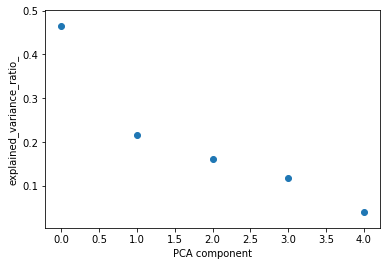

In [15]:
pca = PCA()
pca.fit(parameters_standard)
plt.scatter(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.xlabel('PCA component')
plt.ylabel('explained_variance_ratio_')


In [16]:
X_pca = pca.transform(parameters_standard)
X_pca.shape

(4150, 5)

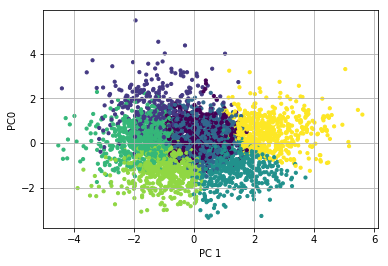

In [17]:
plt.scatter(X_pca[:,0],X_pca[:,1], c=cluster_labels,
            s=10,label=cluster_labels)
pca_centers = pca.transform(clf.cluster_centers_)
plt.scatter(pca_centers[:,0],pca_centers[:,1],marker='x',s=150,c=range(k))
plt.xlabel("PC 1")
plt.ylabel("PC0")
plt.grid()

# TSNE
From http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.


In [18]:
from sklearn.manifold import TSNE

In [30]:
tsne = TSNE(n_components=2)

In [31]:
X_tsne = tsne.fit_transform(parameters_standard)

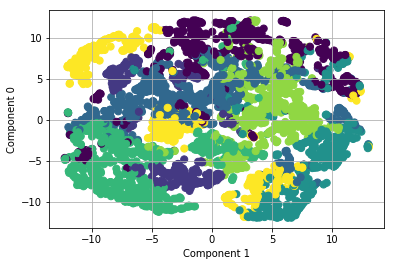

In [32]:
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=cluster_labels,
            s=50,label=cluster_labels)
plt.xlabel("Component 1")
plt.ylabel("Component 0")
plt.grid()

# Isomap
From http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html

Non-linear dimensionality reduction through Isometric Mapping


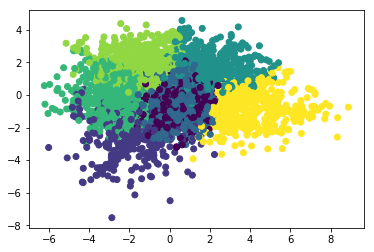

In [22]:
from sklearn.manifold import Isomap
imap = Isomap(n_neighbors=5, n_components=2)
y = imap.fit(parameters_standard)
Y = imap.fit_transform(parameters_standard)
plt.scatter(Y[:, 0], Y[:, 1],c = cluster_labels)

# Spectral Clustering

http://scikit-learn.org/stable/modules/clustering.html#k-means
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.


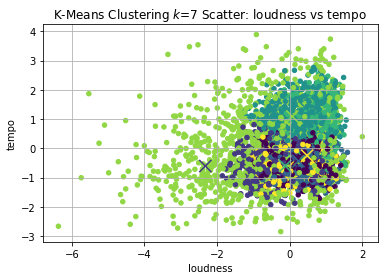

In [23]:
from sklearn.cluster import SpectralClustering

spec = SpectralClustering(n_clusters=7)
spec_labels = spec.fit_predict(parameters_standard)

x_label = "loudness"
y_label = "tempo"
x_in = parameters.columns.get_loc(x_label)
y_in = parameters.columns.get_loc(y_label)
plt.scatter(parameters_standard[:,x_in],
            parameters_standard[:,y_in], c=spec_labels,
            s=20,label=cluster_labels)
plt.scatter(clf.cluster_centers_[:,x_in],clf.cluster_centers_[:,y_in],marker='x',s=150,c=range(k))
plt.title("K-Means Clustering $k$=" + str(k)+ " Scatter: "+x_label+" vs "+y_label)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid()

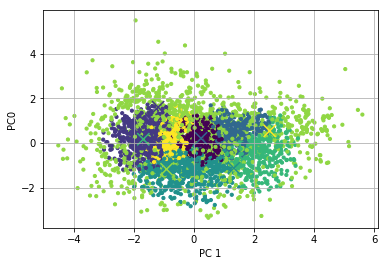

In [24]:
plt.scatter(X_pca[:,0],X_pca[:,1], c=spec_labels,
            s=10,label=cluster_labels)
pca_centers = pca.transform(clf.cluster_centers_)
plt.scatter(pca_centers[:,0],pca_centers[:,1],marker='x',s=150,c=range(k))
plt.xlabel("PC 1")
plt.ylabel("PC0")
plt.grid()

# Agglomerative Clustering

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

Recursively merges the pair of clusters that minimally increases a given linkage distance.

In [25]:
from sklearn.cluster import AgglomerativeClustering

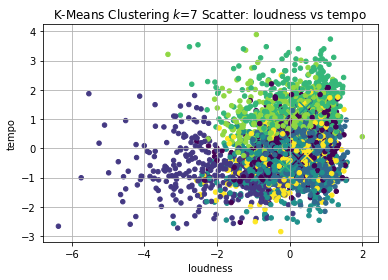

In [26]:
agg = AgglomerativeClustering(n_clusters=7)
agg_labels = agg.fit_predict(parameters_standard)

x_label = "loudness"
y_label = "tempo"
x_in = parameters.columns.get_loc(x_label)
y_in = parameters.columns.get_loc(y_label)
plt.scatter(parameters_standard[:,x_in],
            parameters_standard[:,y_in], c=agg_labels,
            s=20,label=cluster_labels)
plt.scatter(clf.cluster_centers_[:,x_in],clf.cluster_centers_[:,y_in],marker='x',s=150,c=range(k))
plt.title("K-Means Clustering $k$=" + str(k)+ " Scatter: "+x_label+" vs "+y_label)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid()

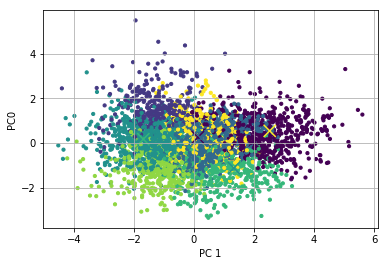

In [27]:
plt.scatter(X_pca[:,0],X_pca[:,1], c=agg_labels,
            s=10,label=cluster_labels)
pca_centers = pca.transform(clf.cluster_centers_)
plt.scatter(pca_centers[:,0],pca_centers[:,1],marker='x',s=150,c=range(k))
plt.xlabel("PC 1")
plt.ylabel("PC0")
plt.grid()

## Compare to genres

Since our operations on the parameters DataFrame preserved indices, we should be able to match genres to clusters

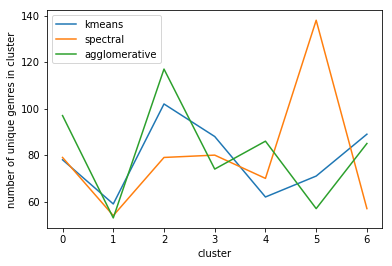

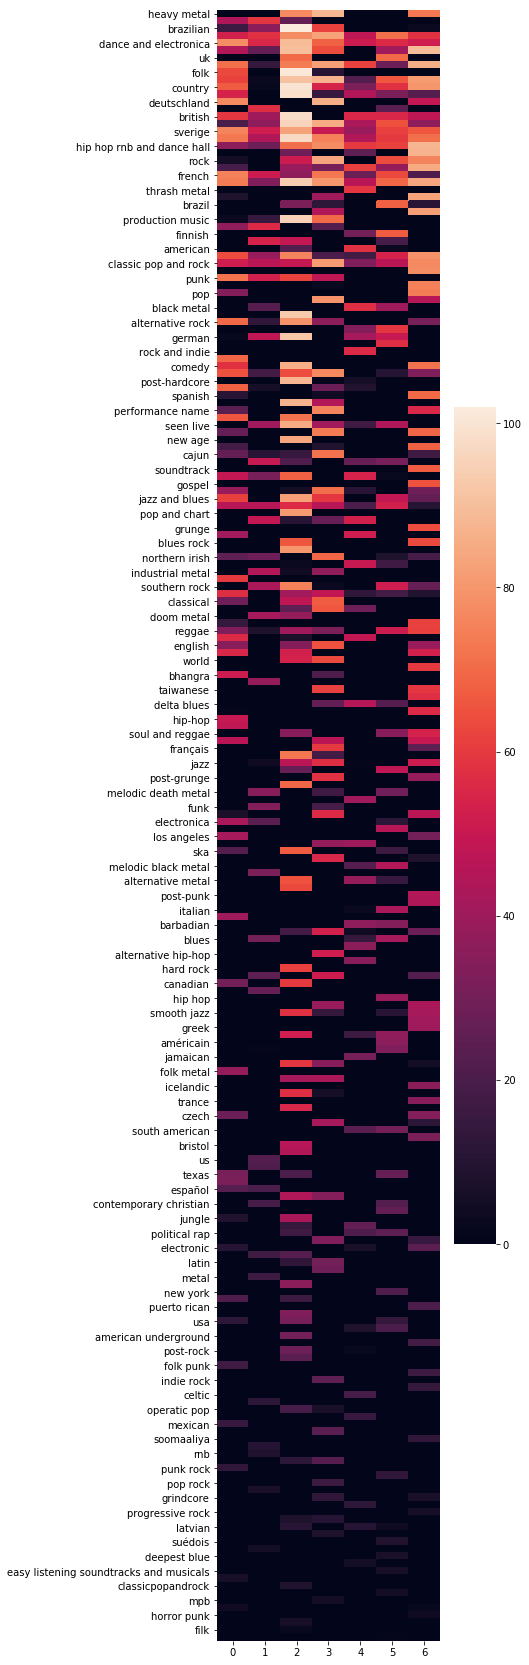

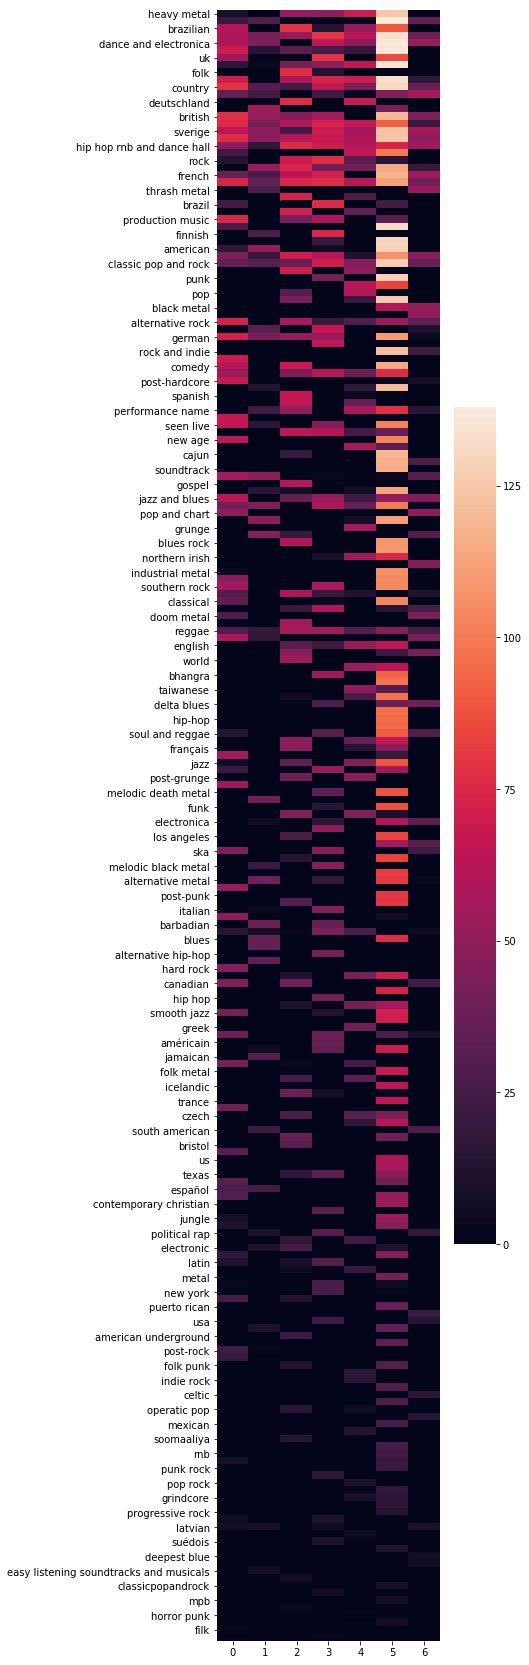

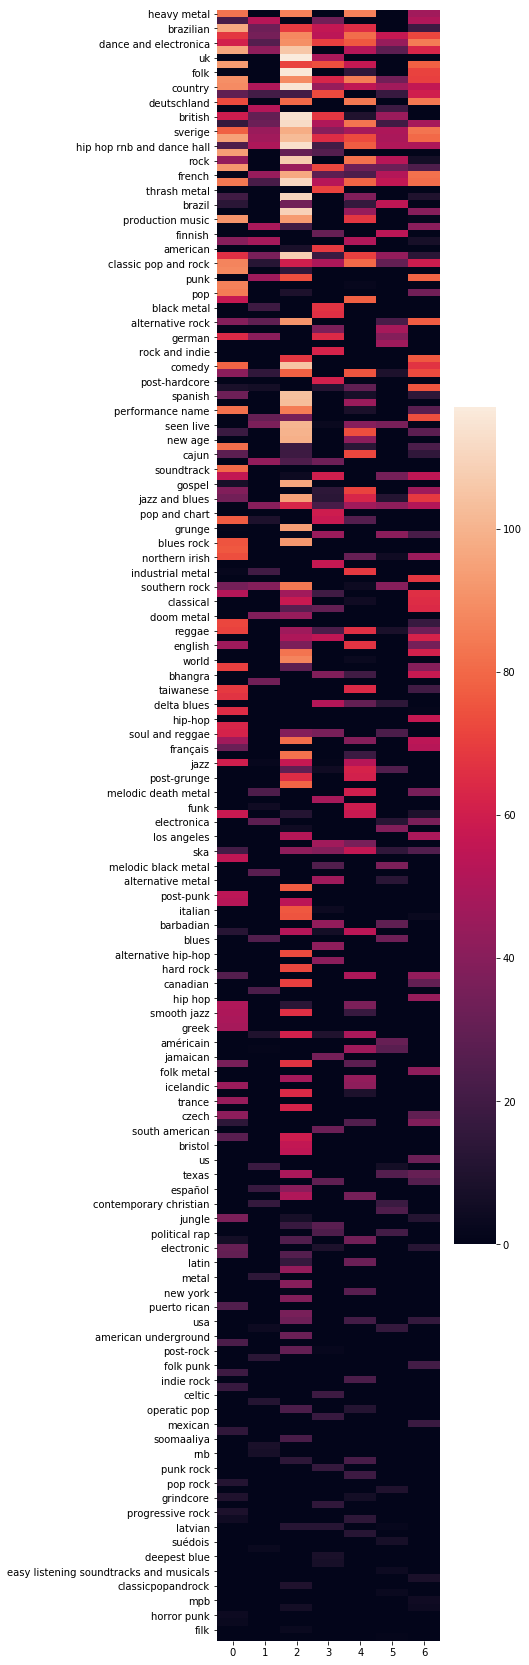

In [28]:
cluster_to_genre = pd.DataFrame({'cluster_labels_kmeans':cluster_labels,'cluster_labels_spec':spec_labels,'cluster_labels_agg':agg_labels}, index = parameters.index)
cluster_to_genre = pd.merge(cluster_to_genre, metadata, left_index=True, right_index=True,how='left')
unique_genres = list(cluster_to_genre.mbtag.dropna().unique())

def num_per_cluster(label):
    grouped = cluster_to_genre.groupby(label)
    num_unique_genres = []
    unique_genres_in_cluster = []
    for i in range(len(grouped)):
        num_unique_genres.append(grouped.get_group(i).mbtag.dropna().nunique())
        unique_genres_in_cluster.append(list(grouped.get_group(i).mbtag.dropna().unique()))
    return num_unique_genres,unique_genres_in_cluster,grouped

def genreTable(ugc,label,grouped):
    overlaps = np.zeros((len(unique_genres),len(grouped)))
    for i in range(len(grouped)):
        locs = []
        for j in range(len(ugc[i])):
            locs.append(unique_genres.index(ugc[i][j]))
            overlaps[locs,i] += 1
    return overlaps

nug_k,ugc_k,g_k = num_per_cluster('cluster_labels_kmeans')
nug_s,ugc_s,g_s = num_per_cluster('cluster_labels_spec')
nug_a,ugc_a,g_a = num_per_cluster('cluster_labels_agg')

overlaps_k = genreTable(ugc_k,cluster_labels,g_k)
overlaps_s = genreTable(ugc_s,spec_labels,g_s)
overlaps_a = genreTable(ugc_a,agg_labels,g_a)

plt.figure()
plt.plot(range(len(set(cluster_labels))),nug_k,label = 'kmeans')
plt.plot(range(len(set(spec_labels))),nug_s, label = 'spectral')
plt.plot(range(len(set(agg_labels))),nug_a, label = 'agglomerative')
plt.xlabel("cluster")
plt.ylabel("number of unique genres in cluster")
plt.legend()

fig = plt.figure(figsize=(5,30))    
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(overlaps_k,ax = ax1)
a = ax1.set_yticklabels(unique_genres)

fig = plt.figure(figsize=(5,30))    
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(overlaps_s,ax = ax1)
a = ax1.set_yticklabels(unique_genres)

fig = plt.figure(figsize=(5,30))    
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(overlaps_a,ax = ax1)
a = ax1.set_yticklabels(unique_genres)

# noise_in_genres = pd.DataFrame({'num_clusters':np.sum(overlaps,axis = 1)},index=unique_genres)
# plt.figure(figsize=(20,3))
# ax = plt.subplot(111)
# sns.countplot(noise_in_genres.num_clusters)
# a = ax.set_xticklabels(unique_genres,rotation=70)
    

# One-hot encoding of genres

In [29]:
#One Hot Encoding
cat_cols = ["mbtag"]
df_continuous = pd.get_dummies(metadata.mbtag,columns=cat_cols)
df_continuous.describe()
df_continuous.to_csv('one_hot_genres.csv')
df_continuous.describe().to_csv('one_hot_genres_stats.csv')

In [103]:
macro_genres = {}
unique_genres2 = set(unique_genres)
tags = ['rock','elec','classic','jazz','punk','blue','house','fusion','rap',
        'rnb','60','alternative','indie','folk',
        'country','dub','easy','metal',
        ['irish','irish','celtic'],
        ['soulreggae','soul','reggae'],
        ['pop','pop','taylor-swift'],
        ['singers','singer','group'],
        ['hip-hop','hip','hop'],
        ['easy','downtempo'],
        ['instrumental','instrumental','saxaphone','orchestral',
         'conductor','guitarist'],
        ['city','new','wave','grindcore','grunge','american underground',
         'hard','core'],
        ['musical','musical','soundtrack','star academy', 'american idol',
             'film', 'production music','singer-songwriter','video game','producer'],
        ['vocal','soprano','whistle register','a cappella'],
        ['christian','christian','gospel']]
for tag in tags:
    if isinstance(tag,list):
        macro_genres[tag[0]] = []
        for t in tag[1:]:
            tagList = [x for x in unique_genres2 if t in x]
            macro_genres[tag[0]] += tagList
            unique_genres2 = unique_genres2.difference(set(tagList))
    else:
        tagList = [x for x in unique_genres2 if tag in x]
        macro_genres[tag] = tagList
        unique_genres2 = unique_genres2.difference(set(tagList))
macro_genres['other'] = unique_genres2
print(unique_genres2)

{'durban', 'bhangra', 'puerto rican', 'english', 'ndw', 'german', 'canadian', 'taiwanese', 'colombian', 'italian', 'finnish', 'via mistica', 'düsseldorf', 'breaks', 'european', 'jamaican', 'norwegian', 'mpb', 'comedy', 'brazilian', 'seen live', 'turkish', 'greek', 'los angeles', 'favorite argentinian', 'español', 'mexican', 'français', 'swedish', 'jimmy tamborello', 'ambient', 'mandarin', 'french', 'australia', 'x', 'betulio medina', 'bossa nova', 'shoegaze', 'carlos baute colgando en tus manos nada se compara a ti', 'belgian', 'méxico', 'lebanese', 'american', 'deutschland', 'soomaaliya', 'wu-tang', 'barbadian', 'idm', 'steal your goals', 'suédois', 'south african', 'funk', 'chinese', 'san francisco', 'uk', 'russian', 'world', 'wichita', 'malian', 'spanish', 'us', 'latvian', 'czech', 'icelandic', 'ace of base', 'performance name', 'filk', 'boston', 'américain', 'latin', 'avant-garde', 'brazil', 'side project', 'bosnia and herzegovina', 'south american', 'salsa', 'madchester', 'cajun',

In [104]:
print(macro_genres.keys())
print([len(x) for x in macro_genres.values()])

dict_keys(['rock', 'elec', 'classic', 'jazz', 'punk', 'blue', 'house', 'fusion', 'rap', 'rnb', '60', 'alternative', 'indie', 'folk', 'country', 'dub', 'easy', 'metal', 'irish', 'soulreggae', 'pop', 'singers', 'hip-hop', 'instrumental', 'city', 'musical', 'vocal', 'christian', 'other'])
[24, 3, 1, 4, 8, 3, 1, 1, 2, 2, 1, 4, 2, 3, 3, 3, 1, 14, 3, 2, 5, 3, 3, 5, 11, 8, 3, 2, 96]


In [111]:
def minor_to_macro_genre(tag):
    for k in macro_genres.keys():
        if tag in macro_genres[k]:
            return k

In [116]:
metadata_macro_genres = metadata.mbtag.apply(minor_to_macro_genre)
metadata_macro_genres.head()

0    metal
1     None
2     None
3     None
4     None
Name: mbtag, dtype: object

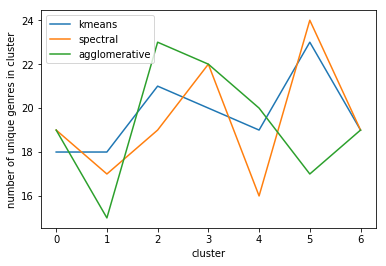

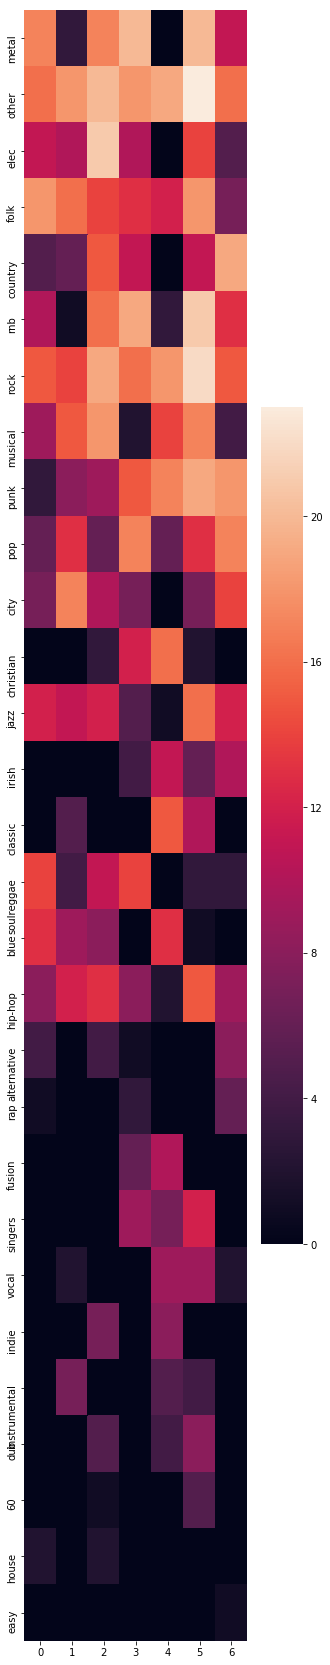

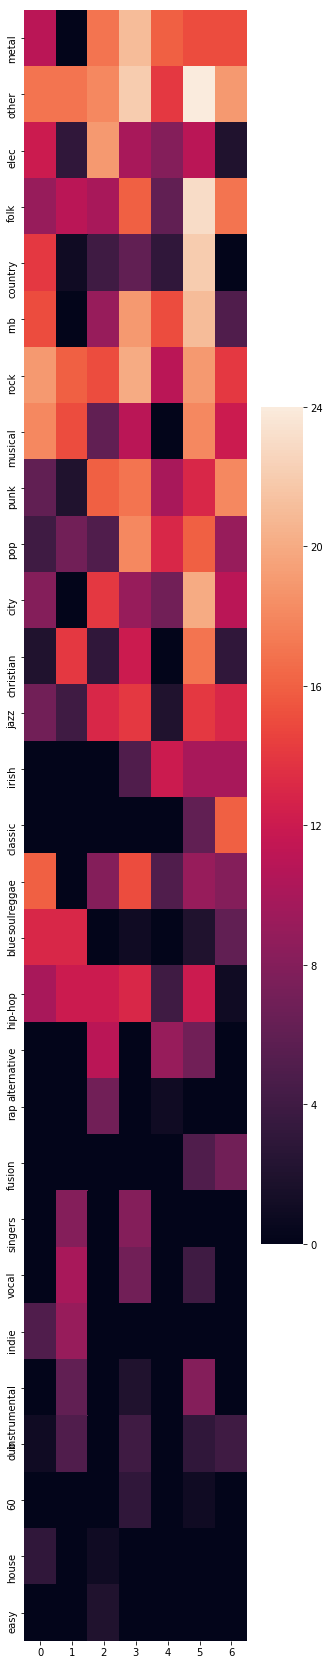

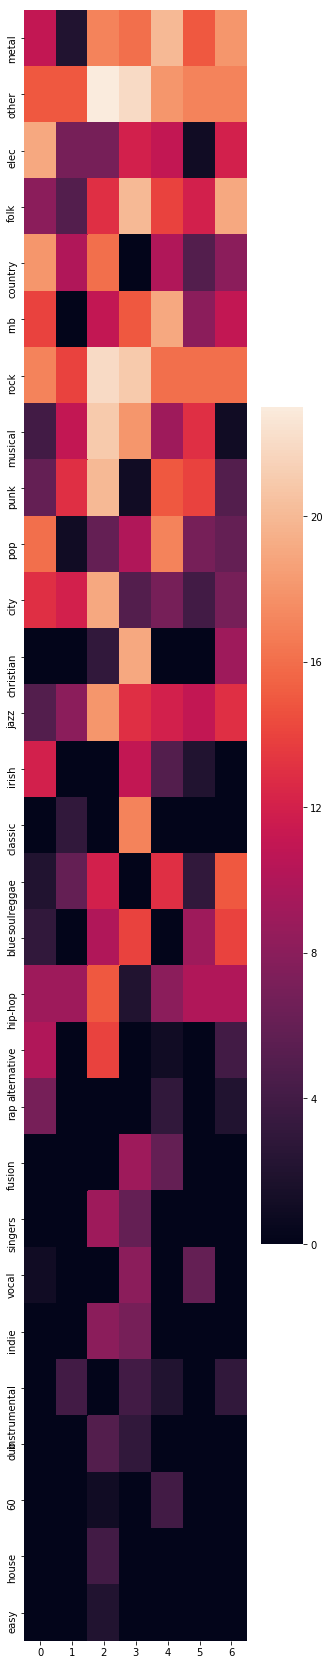

In [119]:
cluster_to_genre = pd.DataFrame({'cluster_labels_kmeans':cluster_labels,'cluster_labels_spec':spec_labels,'cluster_labels_agg':agg_labels}, index = parameters.index)
cluster_to_genre['mbtag'] = metadata_macro_genres.loc[parameters.index]
unique_genres = list(cluster_to_genre.mbtag.dropna().unique())

def num_per_cluster(label):
    grouped = cluster_to_genre.groupby(label)
    num_unique_genres = []
    unique_genres_in_cluster = []
    for i in range(len(grouped)):
        num_unique_genres.append(grouped.get_group(i).mbtag.dropna().nunique())
        unique_genres_in_cluster.append(list(grouped.get_group(i).mbtag.dropna().unique()))
    return num_unique_genres,unique_genres_in_cluster,grouped

def genreTable(ugc,label,grouped):
    overlaps = np.zeros((len(unique_genres),len(grouped)))
    for i in range(len(grouped)):
        locs = []
        for j in range(len(ugc[i])):
            locs.append(unique_genres.index(ugc[i][j]))
            overlaps[locs,i] += 1
    return overlaps

nug_k,ugc_k,g_k = num_per_cluster('cluster_labels_kmeans')
nug_s,ugc_s,g_s = num_per_cluster('cluster_labels_spec')
nug_a,ugc_a,g_a = num_per_cluster('cluster_labels_agg')

overlaps_k = genreTable(ugc_k,cluster_labels,g_k)
overlaps_s = genreTable(ugc_s,spec_labels,g_s)
overlaps_a = genreTable(ugc_a,agg_labels,g_a)

plt.figure()
plt.plot(range(len(set(cluster_labels))),nug_k,label = 'kmeans')
plt.plot(range(len(set(spec_labels))),nug_s, label = 'spectral')
plt.plot(range(len(set(agg_labels))),nug_a, label = 'agglomerative')
plt.xlabel("cluster")
plt.ylabel("number of unique genres in cluster")
plt.legend()

fig = plt.figure(figsize=(5,30))    
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(overlaps_k,ax = ax1)
a = ax1.set_yticklabels(unique_genres)

fig = plt.figure(figsize=(5,30))    
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(overlaps_s,ax = ax1)
a = ax1.set_yticklabels(unique_genres)

fig = plt.figure(figsize=(5,30))    
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(overlaps_a,ax = ax1)
a = ax1.set_yticklabels(unique_genres)

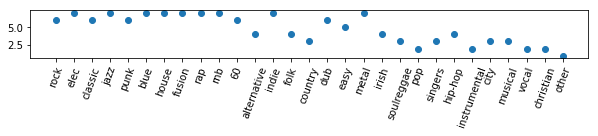

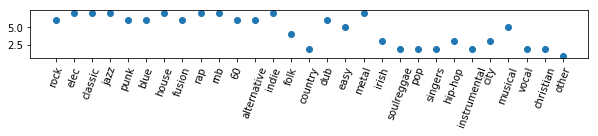

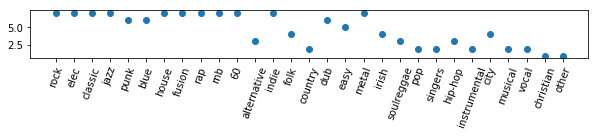

In [137]:
overlaps = [overlaps_k,overlaps_s,overlaps_a]
for n in range(3):
    noise_in_genres = pd.DataFrame({'num_clusters':np.count_nonzero(overlaps[n],axis = 1)},index=unique_genres)
    plt.figure(figsize=(10,3))
    ax = plt.subplot(3,1,n+1)
    plt.scatter(range(len(unique_genres)),noise_in_genres.num_clusters)
    ax.set_xticks(range(len(unique_genres)))
    a = ax.set_xticklabels(macro_genres.keys(),rotation=70)